## Cell Instance Segmentation - Deep Learning Project - Emirhan BULUT

Hello!

I am Emirhan! I am Machine Learning and Deep Learning Engineer. I am very pleased to present to you the artificial intelligence software that I have carefully prepared for the 'Sartorius - Cell Instance Segmentation' competition on Kaggle. This software; Thanks to the high accuracy and low loss system it contains, it detects single neuronal cells in microscopy images according to the rules set by the artificial neuronal networks I have created. In addition, I present the schematic of the model I developed in a .png format with high resolution.

In addition, although the software took a long time to complete due to the insufficient hardware I have, I waited for this time to end for the people in the world and completed the artificial intelligence software.

The artificial intelligence software I developed was first in a 9-pack.

Finally, I developed deep learning (Artificial neural networks) software segmentation that can detect different objects of interest with 97.19% accuracy in biological images showing neuronal cell types.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/train images',
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical')

print(train_generator.image_shape)

test_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/test images',
    target_size=(32, 32),
    batch_size=64,
    class_mode='categorical')

print(test_generator.image_shape)

Found 4307 images belonging to 9 classes.
(32, 32, 3)
Found 1664 images belonging to 9 classes.
(32, 32, 3)


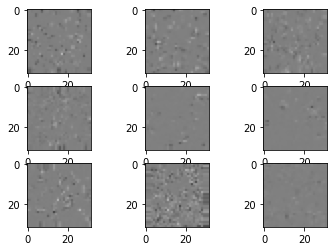

In [ ]:
#plot images :)

from matplotlib import pyplot

x=np.concatenate([train_generator.next()[0] for i in range(train_generator.__len__())])

# plot, first of few images
for i in range(9):
	# define of subplot
	pyplot.subplot(330 + 1 + i)
	# plot, raw pixel of data
	pyplot.imshow(x[i], cmap=pyplot.get_cmap('gray'))
# show of the figure
pyplot.show()

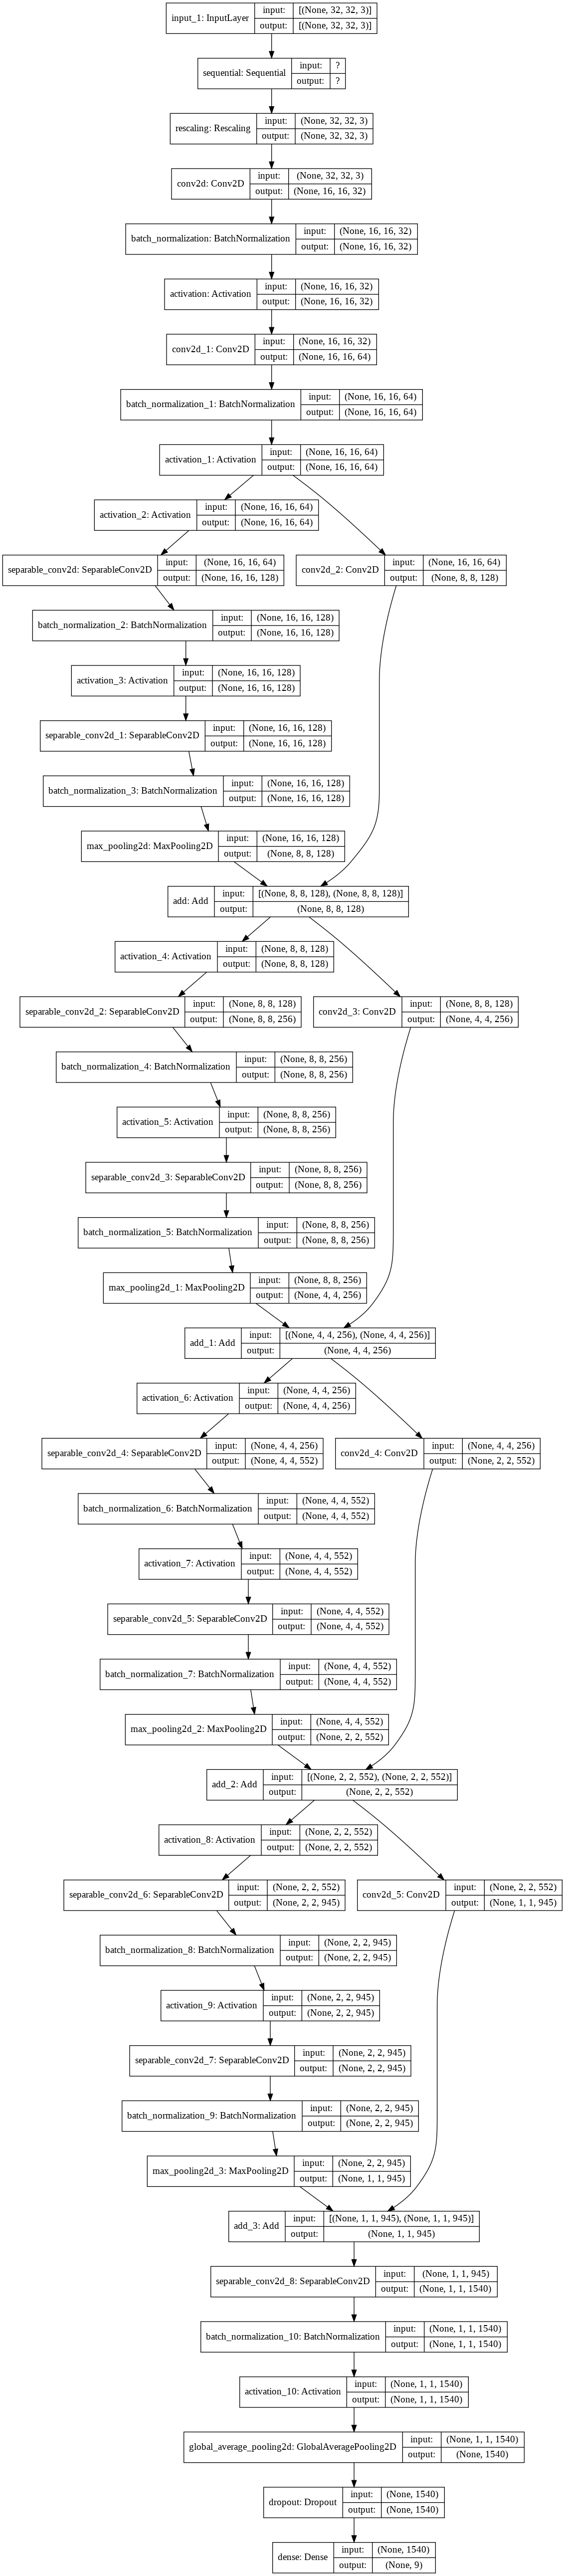

In [9]:
import keras
from keras import layers
from keras import utils
from keras import Sequential

function = Sequential()

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    x = function(inputs)


    x = layers.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x 

    for size in [128, 256, 552, 945]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual]) 
        previous_block_activation = x 

    x = layers.SeparableConv2D(1540, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)

from keras.utils.vis_utils import plot_model

model = make_model(input_shape=(32,32,3), num_classes=9)
plot_model(model, show_shapes=True)

In [ ]:
model.compile(
       optimizer='adam',
       loss="categorical_crossentropy",
       metrics=['accuracy'])

print(train_generator)

model.fit(train_generator,batch_size=16,epochs=200,shuffle=True)

model.save('final_model.h5')


model.summary()

Epoch 1/200
68/68 [==============================] - 982s 14s/step - loss: 1.7546 - accuracy: 0.3211
Epoch 2/200
68/68 [==============================] - 114s 2s/step - loss: 1.6432 - accuracy: 0.3548
Epoch 3/200
68/68 [==============================] - 113s 2s/step - loss: 1.5218 - accuracy: 0.4226
Epoch 4/200
68/68 [==============================] - 114s 2s/step - loss: 1.4436 - accuracy: 0.4544
Epoch 5/200
68/68 [==============================] - 118s 2s/step - loss: 1.3737 - accuracy: 0.4709
Epoch 6/200
68/68 [==============================] - 115s 2s/step - loss: 1.3141 - accuracy: 0.5108
Epoch 7/200
68/68 [==============================] - 114s 2s/step - loss: 1.2412 - accuracy: 0.5419
Epoch 8/200
68/68 [==============================] - 117s 2s/step - loss: 1.2106 - accuracy: 0.5366
Epoch 9/200
68/68 [==============================] - 116s 2s/step - loss: 1.1580 - accuracy: 0.5700
Epoch 10/200
68/68 [==============================] - 114s 2s/step - loss: 1.1175 - accuracy: 0.579

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       multiple             0           input_2[0][0]                    
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 32, 32, 3)    0           sequential_1[0][0]               
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 16, 16, 32)   896         rescaling[0][0]                  
______________________________________________________________________________________________

In [ ]:
filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict(test_generator,nb_samples)

print(predict)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [79]:
import cv2
from keras.models import load_model

import numpy as np

img = cv2.imread('/content/drive/MyDrive/BV2.jpg')
img = cv2.resize(img,(32,32))
img = np.reshape(img,[1,32,32,3])

modell = load_model('/content/drive/MyDrive/final_model.h5')


classes = modell.predict(img)


for class_name in classes[0]:
  if 1.0 == classes[0][0]:
    print("Image in A172 Class")
  elif 1.0 == classes[0][1]:
    print("Image in BT474 Class")
  elif 1.0 == classes[0][2]:
    print("Image in BV2 Class")
    break
  elif 1.0 == classes[0][3]:
    print("Image in Huh7 Class")
  elif 1.0 == classes[0][4]:
    print("Image in MCF7 Class")
  elif 1.0 == classes[0][5]:
    print("Image in RatC6 Class")
  elif 1.0 == classes[0][6]:
    print("Image in SHSY5Y Class")
  elif 1.0 == classes[0][7]:
    print("Image in SkBr3 Class")
  else:
    print("Image in SKOV3 Class")

Image in BV2 Class


In [11]:
!pip install pixellib

     |████████████████████████████████| 430 kB 5.4 MB/s 
     |████████████████████████████████| 8.3 MB 55.7 MB/s 
     |████████████████████████████████| 148 kB 58.7 MB/s 
     |████████████████████████████████| 74 kB 2.6 MB/s 
     |████████████████████████████████| 145 kB 56.7 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 748 kB 41.6 MB/s 
     |████████████████████████████████| 743 kB 61.1 MB/s 
     |████████████████████████████████| 596 kB 44.6 MB/s 
     |████████████████████████████████| 112 kB 55.2 MB/s 
     |████████████████████████████████| 59.9 MB 41 kB/s 
     |████████████████████████████████| 317 kB 52.5 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20211019-py3-none-any.whl size=60878 sha256=82c54208c9bc551db1e120b6640172b574923df5cb75528a4ab44e804da0f558
  Stored in directory: /root/.cache/pip/wheels/d5/d8/f6/3efc4adc326f143da627d450bf74a3c0bec35cb3df37b84f38
  Created wheel for antlr4-python3-runti

In [12]:
import pixellib
from pixellib.semantic import semantic_segmentation 
segment_image = semantic_segmentation()

In [62]:
imgg = cv2.imread('/content/drive/MyDrive/test images/BT474/BT474_Phase_D3_1_00d00h00m_1.tif')
imgg = cv2.resize(imgg,(704,520))
print(imgg.shape)

from PIL import Image
import numpy as np

image = Image.fromarray(imgg)
image.save('testtt.png')
image.show()


(520, 704, 3)


In [77]:
from keras.models import load_model

models = load_model('/content/drive/MyDrive/final_model.h5')

modelss = semantic_segmentation(models)

modelss.segmentAsPascalvoc("/content/testtt.png", output_image_name = "image_new.png")

Processed Image saved successfuly in your current working directory.


({'class_ids': array([ 1,  2,  3,  5,  7,  8,  9, 10, 11, 13, 15, 16, 18]),
  'masks': array([[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]])},
 array([[[128, 128, 128],
         [128, 128, 128],
         [128, 128, 128],
         ...,
         [  0, 128, 128],
         [  0, 128, 128],
         [  0, 128, 128]],
 
        [[128, 128, 128],
         [128, 128, 128],
         [128, 128, 128],
         ...,
         [ 81, 128, 128],
         [ 40, 128, 128],
         [  0, 128, 128]],
 
        [[128, 132, 128],
         [128, 130, 128],
         [128, 128, 128],
         ...,
         [145, 128, 128],
         [ 95, 128, 128],
         [ 36, 128, 128]],
 
        ...,
 
        [[145, 1